<a href="https://colab.research.google.com/github/imuneeb33/Image-Reconstrution-through-Autoencoder/blob/main/AutoEncoder001_se98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING REQUIRED LIBRARIES**

In [5]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist

!pip install numpy

import numpy as np


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**LOADING THE MNIST DATASET**

In [2]:
# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


**NORMALIZATION**

In [3]:
# Normalize the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

**FLATTENING**

In [6]:
# Flatten the images
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


**DEFINING THE ENCODER**

In [19]:
# Define the input layer
input_img = Input(shape=(784,))
# Define the encoded representation
encoded = Dense(32, activation='relu')(input_img)

**DEFINING THE DECODER**

In [9]:
# Define the decoded representation
decoded = Dense(784, activation='sigmoid')(encoded)

**CREATING AUTOENCODER**

In [10]:
# Create the autoencoder
autoencoder = Model(input_img, decoded)


**COMPILING AUTOENCODER**


In [11]:
# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


**TRAINING AUTOENCODER**

In [12]:
# Train the autoencoder
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/50
235/235 [==============================] - 4s 12ms/step - loss: 0.2743 - val_loss: 0.1858
Epoch 2/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1681 - val_loss: 0.1515
Epoch 3/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1426 - val_loss: 0.1323
Epoch 4/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1275 - val_loss: 0.1205
Epoch 5/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1179 - val_loss: 0.1125
Epoch 6/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1109 - val_loss: 0.1068
Epoch 7/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1057 - val_loss: 0.1022
Epoch 8/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1018 - val_loss: 0.0990
Epoch 9/50
235/235 [==============================] - 3s 11ms/step - loss: 0.0991 - val_loss: 0.0967
Epoch 10/50
235/235 [==============================] - 3s 11ms/step - loss: 0.0973 - val_lo

313/313 [==============================] - 0s 1ms/step


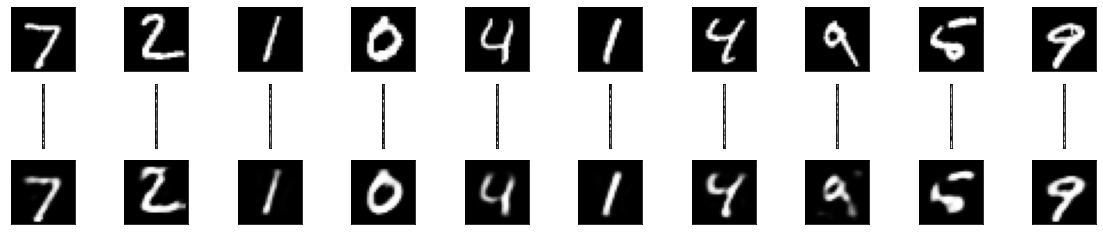

In [17]:
import matplotlib.pyplot as plt

# Use the trained autoencoder to encode the test images
encoded_imgs = autoencoder.predict(x_test)

# Create a new model that consists of only the encoder part of the autoencoder
encoder = Model(input_img, encoded)

# Use the encoder model to encode the test images
encoded_imgs = encoder.predict(x_test)

reconstructed_imgs = autoencoder.predict(x_test)

# Use Matplotlib to plot the original images, encoded images, and reconstructed images
n = 10  # number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Encoded images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(32, 1))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images
    ax = plt.subplot(3, n, i + 1 + n + n)
    plt.imshow(reconstructed_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

%matplotlib inline



In [18]:
# Use the trained autoencoder to reconstruct new images
reconstructed_imgs = autoencoder.predict(x_test)

313/313 [==============================] - 0s 1ms/step
